# Code Challenge - Task 1: Exploratory Data Analysis

***
*Author: Kadriye Nur Bakirci*
***
Contact regarding the code: nur.bakirci@gmail.com
***

This notebook solves data cleaning and dataset preparation task given 2 tabular datasets.

This notebook is divided into 4 main sections.



1.   **Environment Setup**
2.   **Data Loading**
3.   **Descriptive Statistcs**
4.   **Visualisation**
5.   **Summary**

[Datasets Location](https://github.com/kadnur/DataScienceProject/blob/main/sample_sales_data.csv)

## Environment Setup


First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file.

### Import Libraries

General Use Libraries

In [1]:
# Import important libraries
import pandas as pd
import numpy as np

# Libraries for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Define some rules of displaying DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

### Import the Data

Clone repository containing the data.

In [2]:
# Clone the repo containing the raw data
!git clone -l -s https://github.com/kadnur/DataScienceProject.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 292.15 KiB | 2.86 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
# Move to the relative path containing the cloned repo's data
%cd cloned-repo/Data
!ls

/content/cloned-repo/Data
sample_sales_data.csv


## Data loading

Convert the dataset files into Pandas Dataframes.

In [4]:
# Read sample sales data csv data file
Samplesales = pd.read_csv('sample_sales_data.csv')

Explore the first 10 instances of Samplesales.

In [5]:
# Check the head as a sanity check of correct loading of the data
Samplesales.head(10)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
5,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash
6,6,4997b1ae-f5aa-4b9f-8fc8-22ad8f19837c,2022-03-07 19:36:57,14736243-d346-438f-9535-d80fcb9f3882,fruit,standard,1.49,4,5.96,e-wallet
7,7,bfffee68-0736-42af-bd3e-4ca77541b0d6,2022-03-07 19:03:20,0ddc2379-adba-4fb0-aa97-19fcafc738a1,fruit,basic,3.99,4,15.96,credit card
8,8,ce50e984-90cd-4b47-8537-3a4e32e6d314,2022-03-07 11:34:32,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,non-member,3.99,1,3.99,credit card
9,9,f0700cc9-e6f5-4b9a-add4-05e64b4f495b,2022-03-07 09:20:12,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,3,1.47,e-wallet


Explore the last 10 instances of Samplesales.

In [6]:
# Check the head as a sanity check of correct loading of the data
Samplesales.tail(10)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
7819,7819,abad87e6-5424-40cb-832d-afe5195fc3f2,2022-03-07 13:20:19,f4a73cc3-b383-4650-bfa5-970bdcadc737,cleaning products,premium,14.19,3,42.57,credit card
7820,7820,731ab8a0-4943-4bb0-b3f4-adf97d14b210,2022-03-01 19:09:20,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,gold,14.19,3,42.57,debit card
7821,7821,a8109d22-e192-41d4-911d-84c772a68013,2022-03-02 10:42:44,6c8d0a2a-576a-432f-a090-c123dee91aaa,cleaning products,gold,15.49,4,61.96,credit card
7822,7822,6857feab-f2b1-4de7-bd4e-14a838591411,2022-03-04 11:06:33,364035ab-945a-4c34-9734-5167b787ae5c,cleaning products,standard,8.99,3,26.97,debit card
7823,7823,60524862-cd12-47e8-aaa6-9a15e3f2c74d,2022-03-07 12:44:43,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,credit card
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash
7828,7828,afd70b4f-ee21-402d-8d8f-0d9e13c2bea6,2022-03-06 13:50:36,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,non-member,14.99,4,59.96,debit card


Here we saw that there is a one issue of data loading which is unnamed column. Let's drop this column.

In [9]:
# Drop unnamed column
Samplesales = Samplesales.drop("Unnamed: 0", axis=1)

In [10]:
# Check DataFrame
Samplesales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Descriptive statistics

The column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer


Get an overall insight on BankChurners dataframe content.

In [11]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{Samplesales.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{Samplesales.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{Samplesales.info()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{Samplesales.describe(include = object).transpose()}')

Dataset shape:
(7829, 9)

Dataset attributes:
Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
Dataset general information:
None

Dataset description:
Categorical Data
               count unique                          

From the above information, we can come up with some results based on the description of features at the beginning.

*   Transaction_id feature has no issues since it is unique identifier.
*   The most sold category is fruit.
*   The most frequent customer type is non-member.
*   Customers prefer to pay in cash mostly.

We have only one issue here. Since in the description of features, it is pointed out that the timestamp feature's type is datetime, we should change the data type here since it is the object.


In [12]:
# Change datatype
Samplesales['timestamp'] = pd.to_datetime(Samplesales['timestamp'])

# Check the data type
Samplesales['timestamp'].dtype

dtype('<M8[ns]')

Get some overview about numeric data in the dataset.

In [14]:
# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{Samplesales.describe().transpose()}\n')

Dataset description:
Numerical Data
             count       mean        std   min   25%    50%    75%    max
unit_price  7829.0   7.819480   5.388088  0.19  3.99   7.19  11.19  23.99
quantity    7829.0   2.501597   1.122722  1.00  1.00   3.00   4.00   4.00
total       7829.0  19.709905  17.446680  0.19  6.57  14.97  28.47  95.96





*   The unit_price column represents the unit price of some items. The mean provides the average unit price, while the standard deviation gives an indication of the dispersion of prices around the mean.
*   The quantity column represents the quantity of items. The mean provides the average quantity, and the standard deviation indicates the variability in the quantity.
*   The total column represents the total cost of items, likely calculated as the product of unit_price and quantity. The mean provides the average total cost, and the standard deviation gives an indication of the variability in total costs.


From above statistical analysis, we can say there is no null value in the dataset but we can do sanity check.

Do a direct call for printing missing values.

In [16]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((Samplesales.isnull().sum() / len(Samplesales))) * 100}\n')

Percentage of Null Values per Feature
transaction_id    0.0
timestamp         0.0
product_id        0.0
category          0.0
customer_type     0.0
unit_price        0.0
quantity          0.0
total             0.0
payment_type      0.0
dtype: float64



---

## Visualisation

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

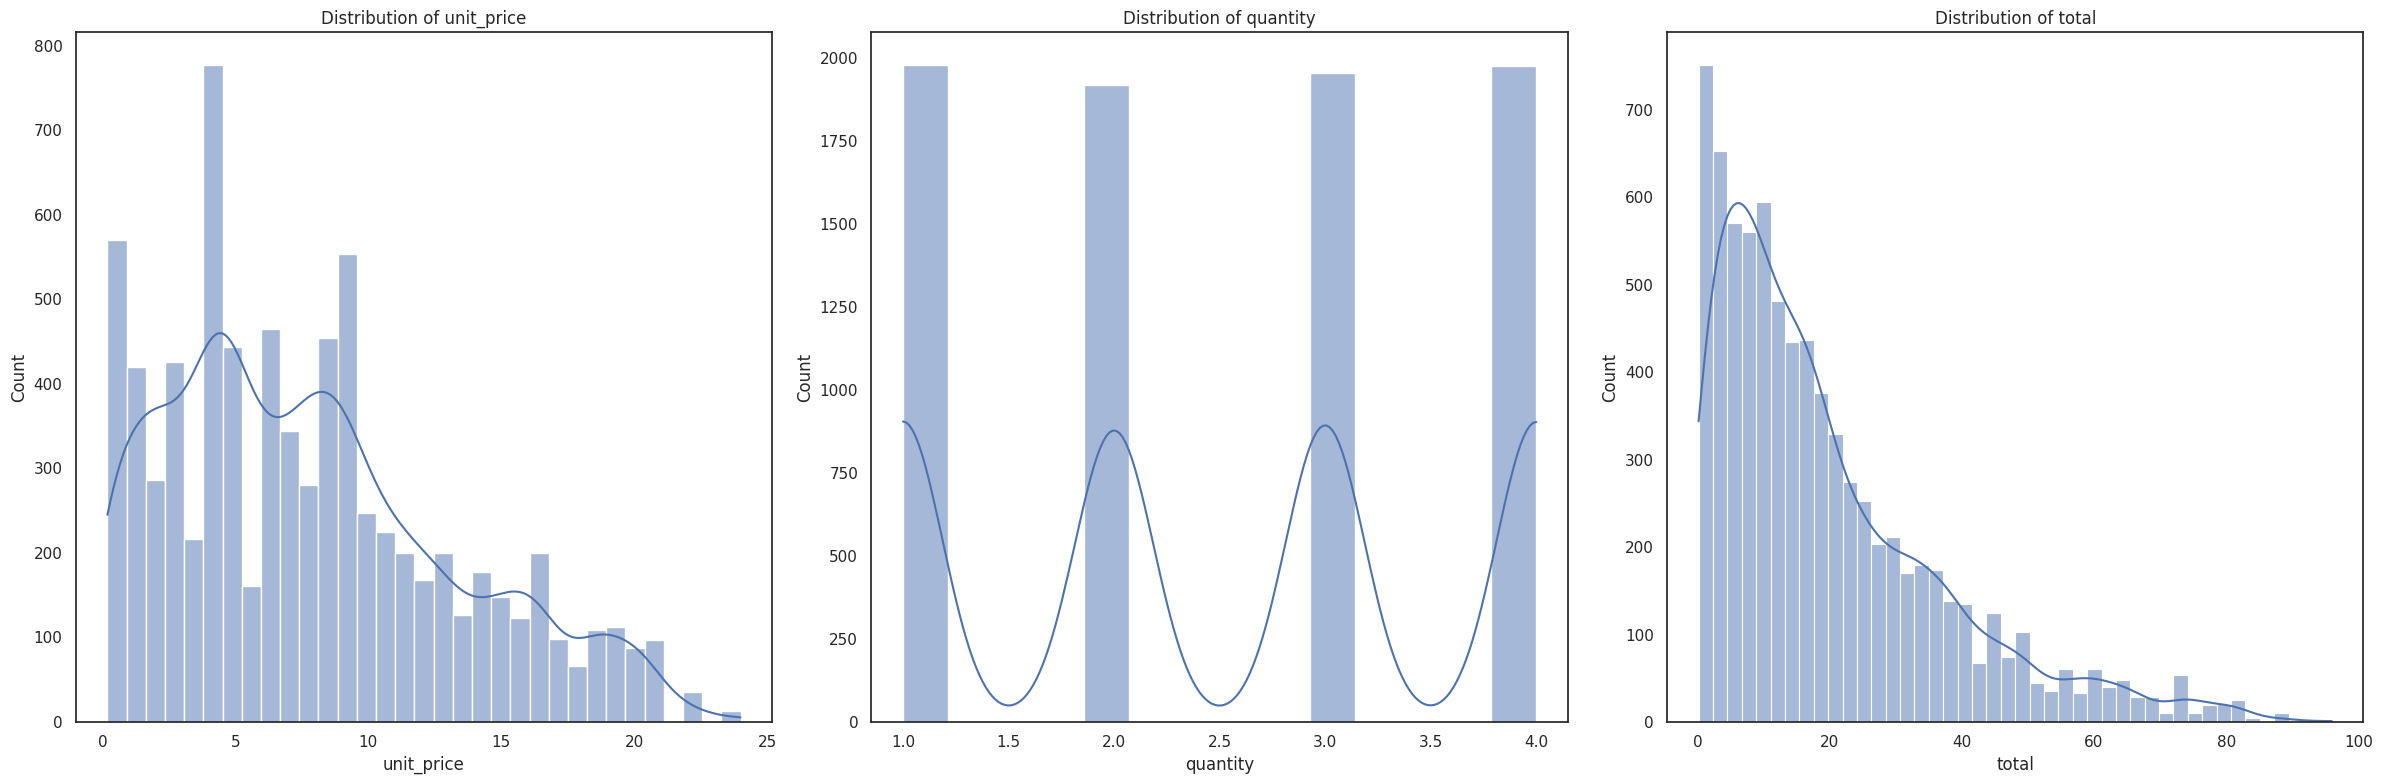

In [19]:
# Create a function to visualise the distribution of numeric columns
def plot_continuous_distributions(data: pd.DataFrame = None, columns: list = None, height: int = 8):
    sns.set(style="white")

    # Create subplots
    fig, axes = plt.subplots(1, len(columns), figsize=(height * len(columns), height))

    # Create a displot using Seaborn for each column in the list
    for i, column in enumerate(columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot columns
plot_continuous_distributions(data=Samplesales, columns=['unit_price', 'quantity', 'total'])

As can be seen in the graphs above, we can conclude the following. There is a tendency to the right in both unit price and total price. This shows that there is a direct proportion between them. From this we can understand the following. Not many sales are made from products with high prices.

In [25]:
# Create a function to show how many unique values are present within a column that are interesting
def get_unique_values(data, columns: list = None):

  # Create a displot using Seaborn for each column in the list
  for column in columns:
      num_unique_values = len(data[column].unique())
      value_counts = data[column].value_counts()
      print(f"Column: {column} has {num_unique_values} unique values\n")
      print(value_counts)
      print()

# Plot columns
get_unique_values(data=Samplesales, columns=['category', 'customer_type', 'payment_type'])

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     191

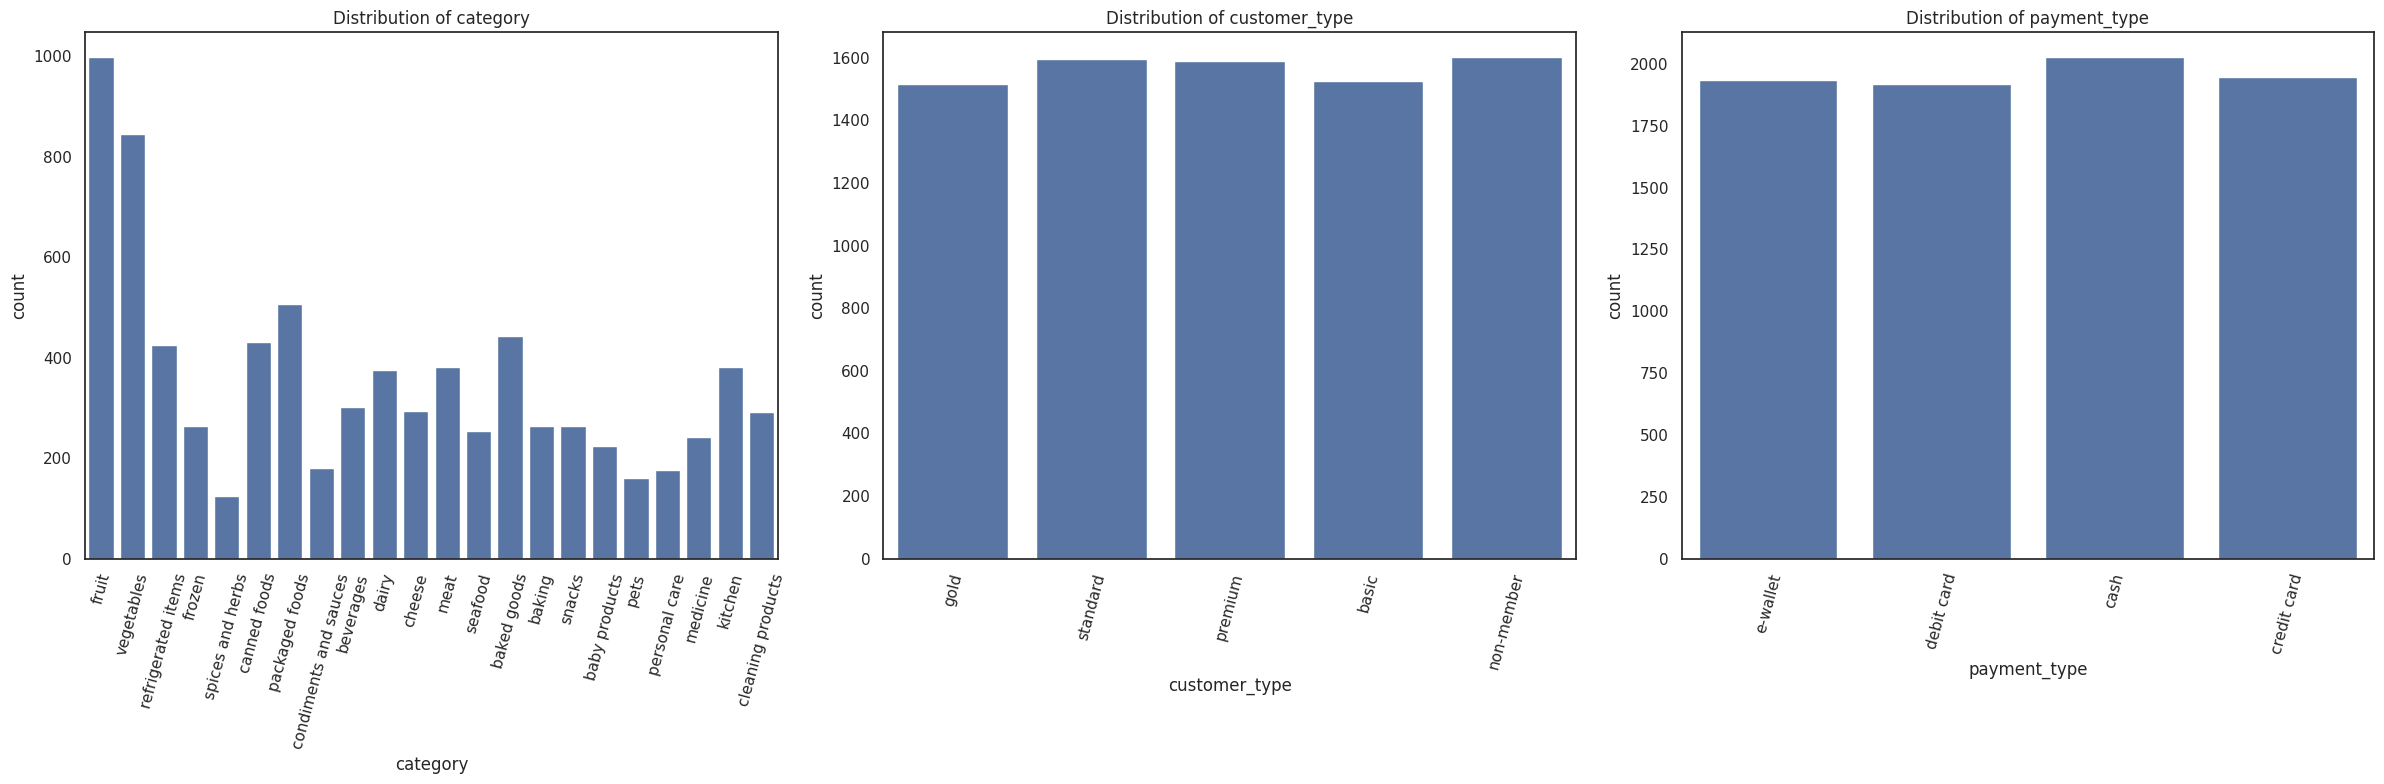

In [31]:
# Create a function to visualise the distribution of categorical columns
def plot_categorical_distribution(data: pd.DataFrame = None, columns: list = None, height: int = 8,aspect: int = 2):
    sns.set(style="white")

    # Create subplots
    fig, axes = plt.subplots(1, len(columns), figsize=(height * len(columns), height))

    # Create a displot using Seaborn for each column in the list
    for i, column in enumerate(columns):
        sns.countplot(data=data, x=column,ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

        # Rotate x-labels by 45 degrees
        axes[i].tick_params(axis='x', rotation=75)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot columns
plot_categorical_distribution(data=Samplesales, columns=['category', 'customer_type', 'payment_type'])

Distribution of customer type and payment type is likely equal. On the other hand, when we look at the distribution of the category, the amount of sold fruits and vegetables is really high compared with the other categories.

<ipython-input-49-2f2ab24cf498>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(Samplesales.corr())
<ipython-input-49-2f2ab24cf498>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(Samplesales.corr(), cmap="YlGnBu", annot=True)


            unit_price  quantity     total
unit_price    1.000000  0.024588  0.792018
quantity      0.024588  1.000000  0.521926
total         0.792018  0.521926  1.000000


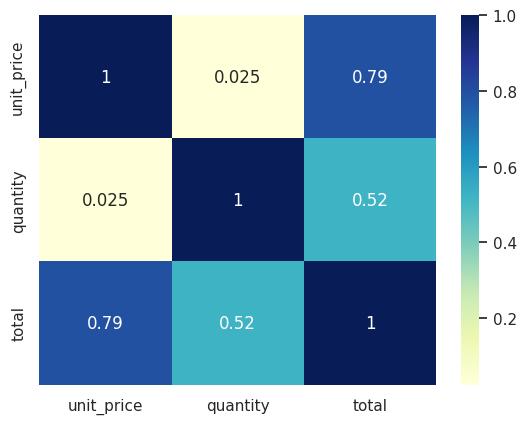

In [49]:
# Plot the correlations between the numeric columns within the data
print(Samplesales.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(Samplesales.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

From above we can say that the correlation between quantity and unit price is not high but total price and unit price is highly correlated.

---

## Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data.
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product.
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for.

